In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040483.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4        5         6  \
0  0.368627  0.360784  0.356863  0.352941  0.352941  0.34902  0.345098   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.341176  0.337255  0.329412  ...  0.411765  0.427451  0.435294  0.439216   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.435294  0.427451  0.419608  0.407843         102.0      64.097222  

[1 rows x 4202 columns]
[102.]  /  [64.09722222]
          0         1         2         3         4        5         6  \
0  0.368627  0.360784  0.356863  0.352941  0.352941  0.34902  0.345098   

          7         8         9  ...      4190      4191      4192      4193  \
0  0.341176  0.337255  0.329412  ...  0.372549  0.396078  0.411765  0.427451   

       4194      4195      4196      4197      4198      4199  
0  0.435294  0.439216  0.435294  0.427451  0.419608  0.407843  

[1 rows x 4200 columns]


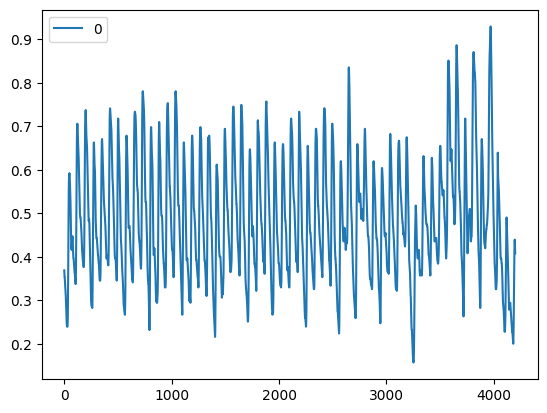

In [447]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [448]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

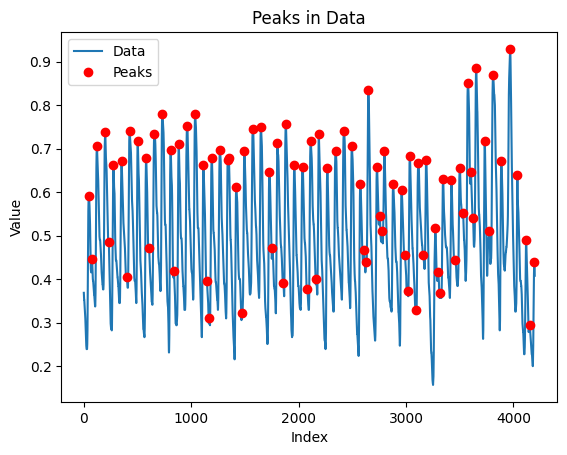

{'indices': array([  47,   76,  122,  199,  230,  276,  351,  399,  426,  502,  580,
        605,  657,  731,  808,  838,  884,  963, 1036, 1113, 1145, 1169,
       1191, 1268, 1340, 1349, 1419, 1474, 1495, 1574, 1649, 1728, 1757,
       1802, 1857, 1881, 1960, 2037, 2082, 2112, 2165, 2187, 2267, 2344,
       2422, 2495, 2575, 2609, 2628, 2649, 2729, 2755, 2776, 2799, 2880,
       2959, 2991, 3016, 3035, 3093, 3116, 3160, 3189, 3273, 3300, 3319,
       3345, 3423, 3459, 3501, 3529, 3577, 3605, 3622, 3653, 3733, 3776,
       3811, 3888, 3970, 4037, 4119, 4152, 4195]), 'values': array([0.59215686, 0.44705882, 0.70588235, 0.7372549 , 0.48627451,
       0.6627451 , 0.67058824, 0.40392157, 0.74117647, 0.71764706,
       0.67843137, 0.47058824, 0.73333333, 0.78039216, 0.69803922,
       0.41960784, 0.70980392, 0.75294118, 0.78039216, 0.6627451 ,
       0.39607843, 0.30980392, 0.67843137, 0.69803922, 0.6745098 ,
       0.67843137, 0.61176471, 0.32156863, 0.69411765, 0.74509804,
       0.74901

In [449]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [450]:
def remove_close_values_df(df, threshold=0.1):
    """
    Remove rows from a DataFrame where the difference between consecutive values is less than the specified threshold.

    Parameters:
    - df: DataFrame
    - threshold: float, minimum difference required to keep a value (default: 0.2)

    Returns:
    - filtered_df: DataFrame with close values removed
    """
    filtered_df = df.iloc[:1]  # Start with the first row

    for i in range(1, len(df)):
        if abs(df.iloc[i]['Value'] - filtered_df.iloc[-1]['Value']) >= threshold:
            filtered_df = pd.concat([filtered_df, df.iloc[[i]]], ignore_index=True)

    return filtered_df


# Example usage
filtered_df = remove_close_values_df(peak_values_df)
print(filtered_df)

    Index     Value
0      47  0.592157
1      76  0.447059
2     122  0.705882
3     230  0.486275
4     276  0.662745
5     399  0.403922
6     426  0.741176
7     605  0.470588
8     657  0.733333
9     838  0.419608
10    884  0.709804
11   1145  0.396078
12   1191  0.678431
13   1474  0.321569
14   1495  0.694118
15   1757  0.470588
16   1802  0.713725
17   1857  0.392157
18   1881  0.756863
19   2082  0.376471
20   2112  0.717647
21   2165  0.400000
22   2187  0.733333
23   2575  0.619608
24   2609  0.466667
25   2649  0.835294
26   2729  0.658824
27   2755  0.545098
28   2799  0.694118
29   2991  0.454902
30   3035  0.682353
31   3093  0.329412
32   3116  0.666667
33   3160  0.454902
34   3189  0.674510
35   3273  0.517647
36   3300  0.415686
37   3345  0.631373
38   3459  0.443137
39   3501  0.654902
40   3529  0.552941
41   3577  0.850980
42   3605  0.647059
43   3622  0.541176
44   3653  0.886275
45   3733  0.717647
46   3776  0.509804
47   3811  0.870588
48   3888  0.670588


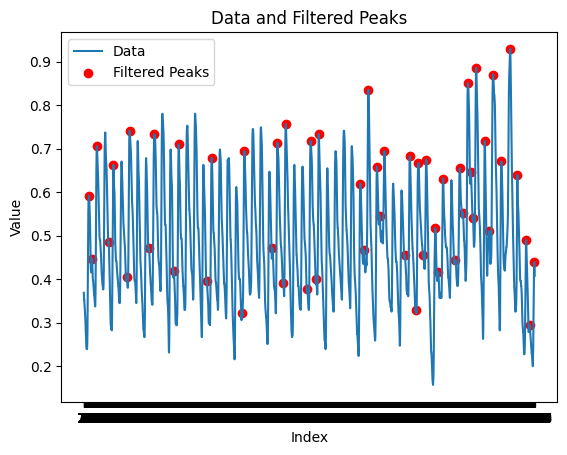

In [451]:
# Plot transposed_df as a line plot
plt.plot(transposed_df.index, transposed_df.values.flatten(), label='Data')

# Plot filtered_df as a scatter plot with dots
plt.scatter(filtered_df['Index'], filtered_df['Value'], color='red', label='Filtered Peaks')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data and Filtered Peaks')
plt.legend()

# Show plot
plt.show()

In [454]:
def split_values_high_low(filtered_df, threshold=0.56):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[0.592156862745098, None, 0.7058823529411765, 0.7372549019607844, None, 0.6627450980392157, 0.6705882352941176, None, 0.7411764705882353, 0.7176470588235294, 0.6784313725490196, None, 0.7333333333333333, 0.7803921568627451, 0.6980392156862745, None, 0.7098039215686275, 0.7529411764705882, 0.7803921568627451, 0.6627450980392157, None, None, 0.6784313725490196, 0.6980392156862745, 0.6745098039215687, 0.6784313725490196, 0.611764705882353, None, 0.6941176470588235, 0.7450980392156863, 0.7490196078431373, 0.6470588235294118, None, 0.7137254901960784, None, 0.7568627450980392, 0.6627450980392157, 0.6588235294117647, None, 0.7176470588235294, None, 0.7333333333333333, 0.6549019607843137, 0.6941176470588235, 0.7411764705882353, 0.7058823529411765, 0.6196078431372549, None, None, 0.8352941176470589, 0.6588235294117647, None, None, 0.6941176470588235, 0.6196078431372549, 0.6039215686274509, None, None, 0.6823529411764706, None, 0.6666666666666666, None, 0.6745098039215687, None, None, None, 0.6

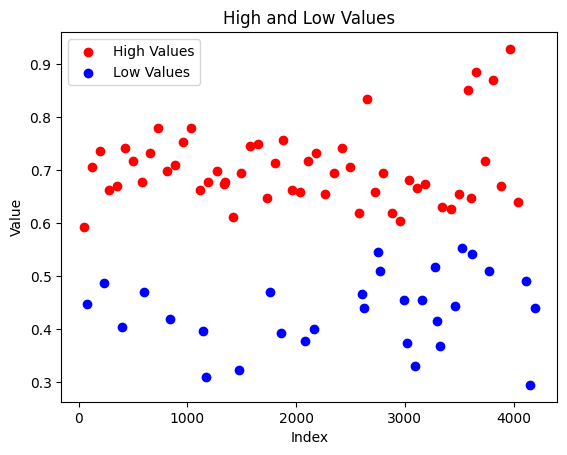

In [455]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [456]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7040668119099491
Average Low Value: 0.434640522875817
